| <font color='red'>Belangrijk!</font> |
|:---|
|Lees voor het maken de inleverinstructies door in de toetsbeschrijving (MS Teams, kanaal algemeen, Files, Moduledocumentatie).  Het niet opvolgen van deze instructies kan leiden tot een onvoldoende |



# Wat is het eindcijfer dat ik voor machine learning ga krijgen?
Bij werkcollege1 heb je de vraag "Ga ik machine learning halen?" beantwoord. 
Nu kunnen we een stap verder gaan: we gaan voorspellen wat jouw eindcijfer gaat zijn op basis van jouw werkhouding en gegevens van vorige studenten. 
Na 2 werkcolleges, is jouw machine learning kennis een stukje gegroeid ten opzichte van het eerste werkcollege. Je hebt mischien ook jouw geplande inzet aangepast. Je kunt nu beter inschatten hoeveel uur je per week aan de werkcolleges en aan de kennisclips besteed.  

Laten we beginnen met de belangrijkste python machine learning modules te importeren. Het is good practise in python om al je import statements bovenaan de file te zetten, zodat je in 1 oogopslag kunt zien welke pakketten je voor deze file nodig hebt. Zo hoef je maar 1 keer de missende pakketten te installeren

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## 1. het stellen van de juiste vraag
De eerste stap in de machine learning workflow is het definieren van de onderzoeksvraag. 

### De onderzoeksvraag
Onze onderzoeksvraag is eigenlijk al gegeven:

    Wat is de cijfer die ik voor machine learning ga krijgen?

Wat valt ons op aan deze vraag? 
Ten eerste, je kunt deze vraag met een numeriek waarde beantwoorden. Het is dus een regressie probleem. 
Gelukkig hebben we in de onze dataset ook de cijfers van de studenten. Laten we die dataset eens inlezen. 

Zoals je in de kennnisclips hebt gezien hebben we oude data met de bijbehorende uitkomst nodig om een model te kunnen bouwen. 

We moeten dus andere studenten informatica van de HS Leiden vragen wat hun inzet was tijdens deze module en het cijfer die ze voor het vak gekregen hebben.

Deze staan in het .csv bestand "imal_eindcijfers.csv". In __tabel 1__ staat de uitleg over de gegevens in die tabel. 

__Tabel 1:__ De variabelen voor halen van Machine Learning, de afhankelijke variabele staat met een * aangegeven. Dit is de waarde die we willen voorspellen voor nieuwe data.
<table>
    <tr>
        <th>Variabele</th>
        <th>kolomnaam</th>
        <th>Datatype</th>
        <th>Waarde</th>
    </tr>
    <tr>
        <td>Student</td>
        <td>Anoniem studentnummer</td>
        <td>int64</td>
        <td>Getal tussen de 0 en max aantal bevraagde studenten</td>
    </tr>
    <tr>
        <td>specialisatie</td>
        <td>De specialisatie die de student volgt</td>
        <td>object (string)</td>
        <td>"SE","FICT","BDAM","IAT"</td>
    </tr>
    <tr>
        <td>gemiste_WC</td>
        <td>Aantal gemiste werkcolleges Machine Learning</td>
        <td>int64</td>
        <td>"nul","een","twee","drie","vier","vijf","zes","zeven"</td>
    </tr>
    <tr>
        <td>vragen_stellen</td>
        <td>Student stelt vragen tijdens de les</td>
        <td>object (string)</td>
        <td>'nooit' 'weinig' 'gemiddeld' 'veel' 'vaak'</td>
    </tr>
    <tr>
        <td>interesse_ML</td>
        <td>Interesse in Machine Learning van student</td>
        <td>object (string)</td>
        <td>'geen' 'weinig' 'gemiddeld' 'veel' 'superveel'</td>
    </tr>
    <tr>
        <td>bestuderen_theorie</td>
        <td>Uren per week besteed aan leren theorie via kennisclips</td>
        <td>Float64</td>
        <td>Getal tussen de 0 en 168(=24*7)</td>
    </tr>
    <tr>
        <td>oefenen_WC</td>
        <td>Uren per week besteed aan oefenen via werkcollege opdrachten</td>
        <td>int64</td>
        <td>Getal tussen de 0 en 168(=24*7)</td>
    </tr>
    <tr>
        <td>voorkennis</td>
        <td>Het gemiddelde cijfer van de modules tot nu toe</td>
        <td>Float64</td>
        <td>Getal tussen de 0 en 10</td>
    </tr>
    <tr>
        <td>uren_bijbaan</td>
        <td>Uren per week besteed aan bijbaan</td>
        <td>Float64</td>
        <td>Getal tussen de 0 en 168(=24*7)</td>
    </tr>
    <tr>
        <td>totale_tijd</td>
        <td>Gemiddelde studietijd per week voor module (in uren)</td>
        <td>Float64</td>
        <td>Getal tussen de 0 en 168(=24*7)</td>
    </tr>
    <tr>
        <td>*eindcijfer</td>
        <td>Het cijfer die de student krijgt</td>
        <td>Float64</td>
        <td>Getal tussen 1 en 10</td>
    </tr>
</table>


Elke rij in deze tabel is het antwoord van 1 student. Deze rij heet een __feature vector__ en die bevat de eigenschappen voor die ene student. Het aantal rijen in de tabel is gelijk aan het aantal studenten die antwoord op onze enquete hebben gegeven. Als je de data gaat sorteren, zorg dat dat je alle kolommen sorteert, anders hussel je de antwoorden van de studenten door elkaar en is jouw data dus niks meer waard.

## 2. Data voorbereiding
Allereerst gaan we de dataset inladen en kijken waar we mee te maken hebben. Bereid nu zelf de data voor aan de hand van de aanwijzingen van de eerdere colleges. We gaan er nu vanuit dat je ook zelf code kunt toevoegen om de data te bekijken.

Geef wel de voorgedefinieerde functies en variabelen met de waarden en/of functie waarom gevraagd wordt.

Zet in onderstaande variabele ```pad_naar_file``` het pad naar jouw dataset.

In [5]:
pad_naar_file = "imal_eindcijfers.csv"
type(pad_naar_file)

str

De functie ```read_data``` krijgt een string met de filelokatie als input, leest deze in en geeft een pandas dataframe terug.

In [6]:
def read_data(csv_file):
    dataframe = pd.read_csv(csv_file)

    return dataframe

In [7]:
#hier wordt jouw functie aangeroepen en bevat df nu het dataframe
df = read_data(pad_naar_file);

## voorbewerken data 
Vul onderstaande functies in en roep deze vervolgens aan op de data. We gaan ervanuit dat je dit nu zonder verdere uitleg zelf kunt doen omdat je dat bij voorgaande werkcolleges al uitgebreid hebt geleerd. Bij verwijder kolommen en Standardize is nog wat extra uitleg gegeven. 

### null waarden

Maak onderstaande functie ```vervang_nan``` af. Deze functie krijgt een dataframe en vervangt de NaN met een goede vervangende waarde in de kolommen waarin er missende waarden zijn. De functie heeft geeft een DataFrame zonder NaN terug.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student             750 non-null    int64  
 1   specialisatie       750 non-null    object 
 2   gemiste_WC          744 non-null    object 
 3   vragen_stellen      741 non-null    object 
 4   interesse_ML        745 non-null    object 
 5   bestuderen_theorie  737 non-null    float64
 6   oefenen_WC          749 non-null    float64
 7   voorkennis          748 non-null    float64
 8   uren_bijbaan        720 non-null    float64
 9   totale_tijd         745 non-null    float64
 10  eindcijfer          750 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 64.6+ KB


In [9]:
df.describe()

,student,bestuderen_theorie,oefenen_WC,voorkennis,uren_bijbaan,totale_tijd,eindcijfer
count,750.00000,737.000000,749.000000,748.000000,720.000000,745.000000,750.000000
mean,375.50000,2.959566,2.957677,6.400267,3.992222,6.425638,5.412267
std,216.65064,1.414480,1.432365,0.612061,0.972727,2.766568,2.385674
min,1.00000,0.000000,0.000000,5.500000,1.400000,0.200000,1.000000
25%,188.25000,2.000000,2.000000,5.900000,3.300000,4.800000,3.700000
50%,375.50000,3.200000,3.300000,6.400000,3.950000,7.000000,5.800000
75%,562.75000,4.000000,4.100000,6.800000,4.700000,8.600000,7.400000
max,750.00000,5.600000,5.900000,8.400000,7.100000,11.800000,9.100000


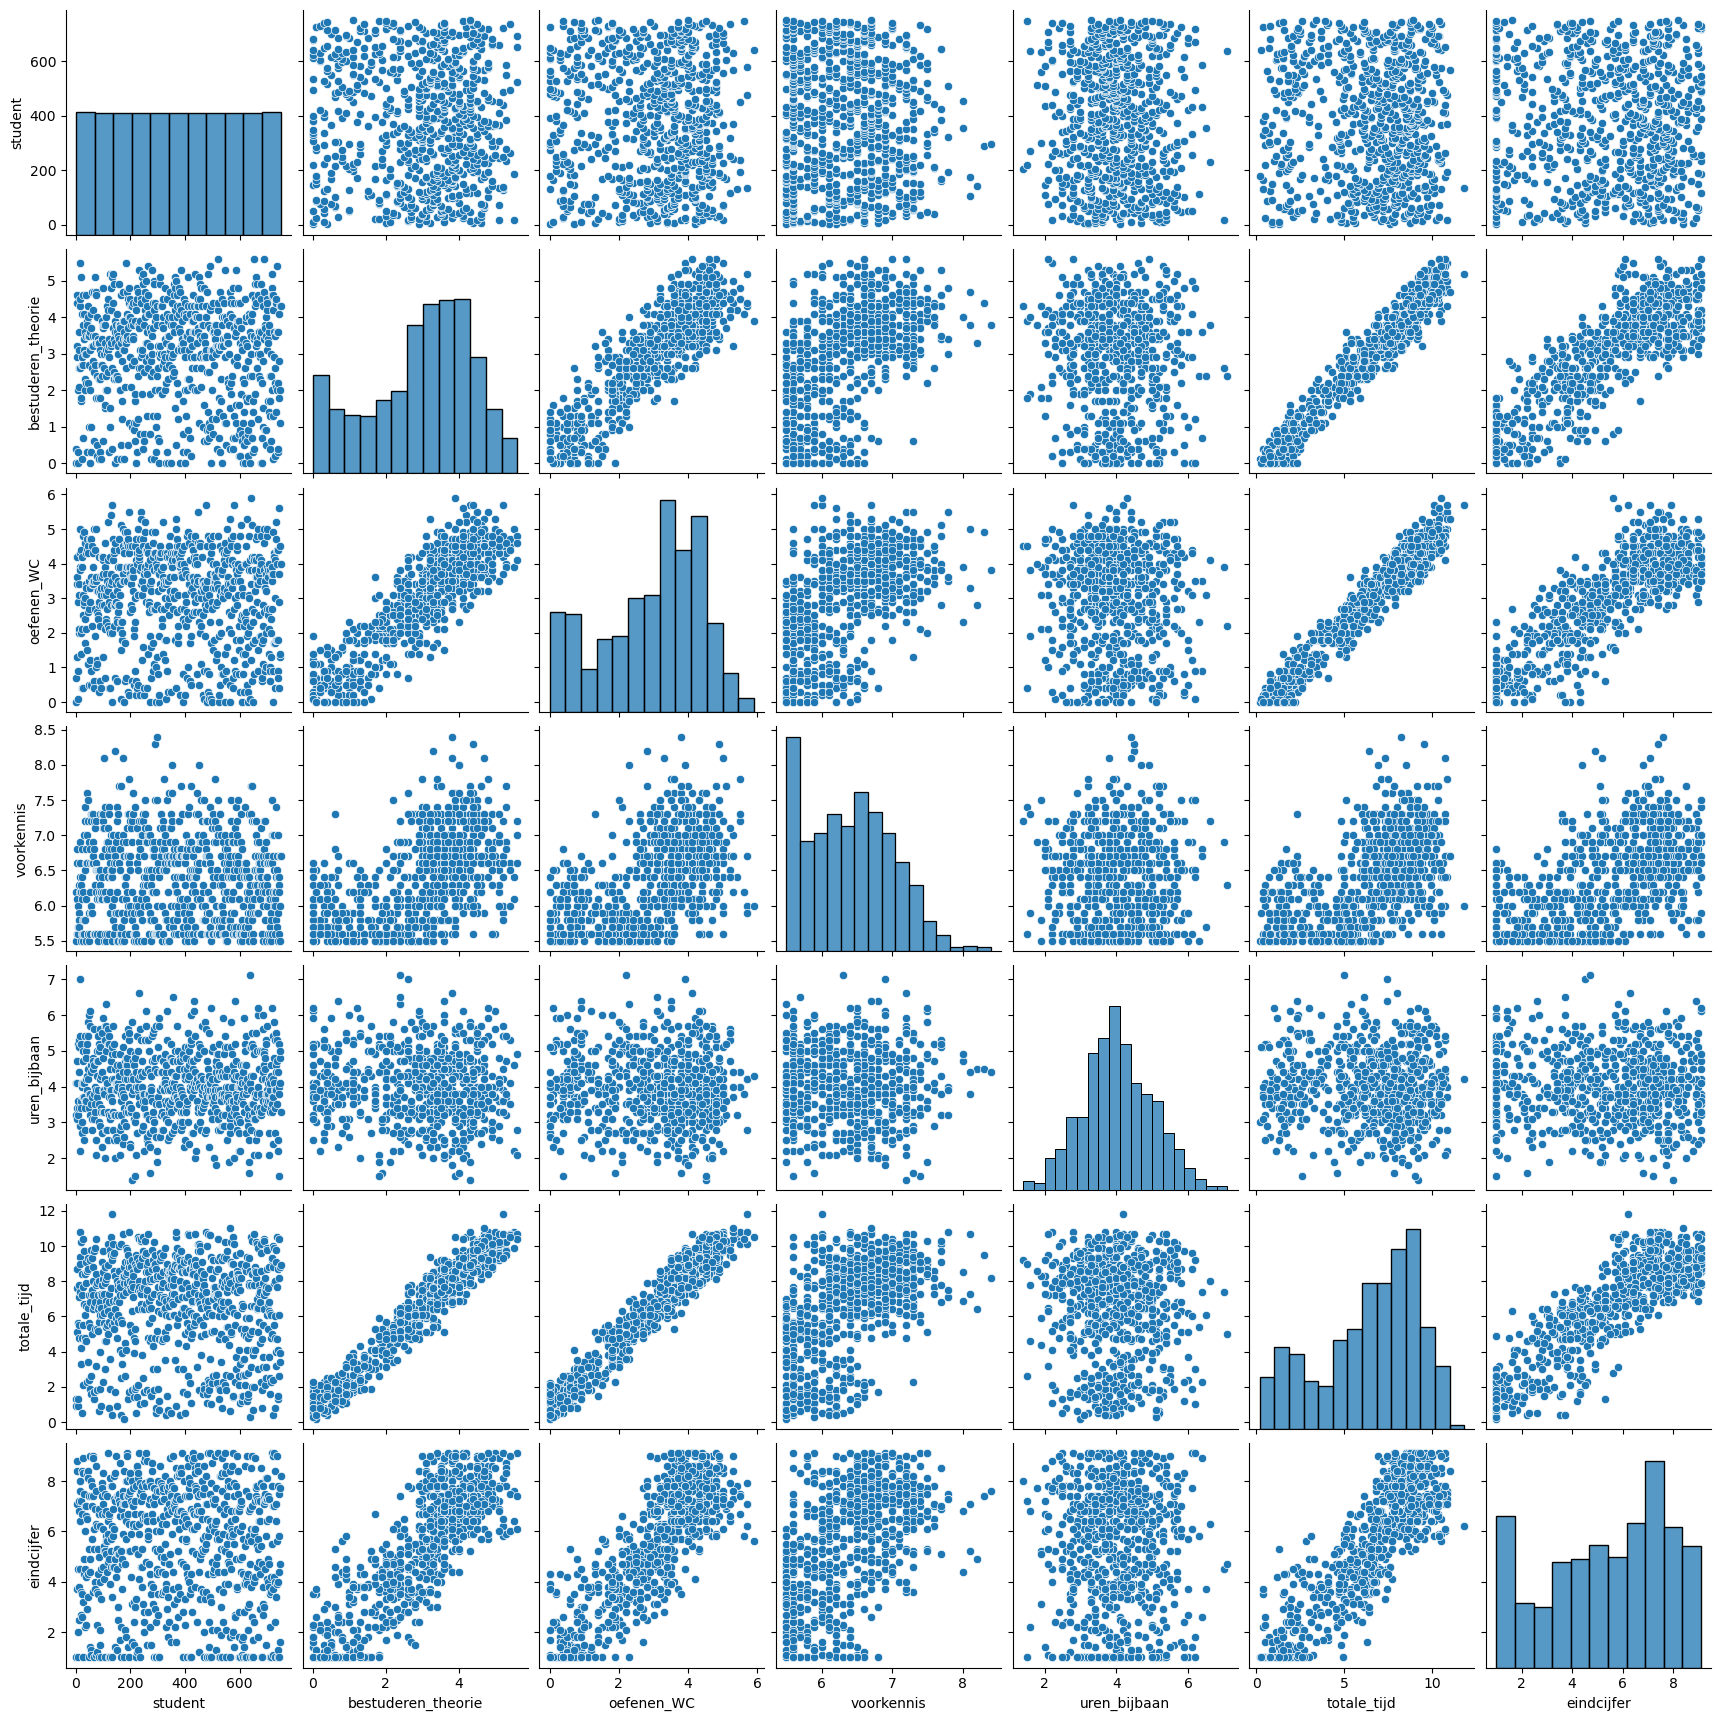

In [10]:
sns.pairplot(df, height=2.5)

In [11]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      student  specialisatie  gemiste_WC  vragen_stellen  interesse_ML  \
0      False          False       False           False         False   
1      False          False       False           False         False   
2      False          False       False           False         False   
3      False          False       False           False         False   
4      False          False       False           False         False   
..       ...            ...         ...             ...           ...   
745    False          False       False            True         False   
746    False          False       False           False         False   
747    False          False       False           False         False   
748    False          False       False           False         False   
749    False          False       False           False         False   

     bestuderen_theorie  oefenen_WC  voorkennis  uren_bijbaan

In [12]:
def vervang_nan(dataframe):
    dataframe['gemiste_WC'].fillna(dataframe['gemiste_WC'].mode()[0], inplace=True)
    dataframe['vragen_stellen'].fillna(dataframe['vragen_stellen'].mode()[0], inplace=True)
    dataframe['interesse_ML'].fillna(dataframe['interesse_ML'].mode()[0], inplace=True)
    dataframe['bestuderen_theorie'].fillna(dataframe['bestuderen_theorie'].median(), inplace=True)
    dataframe['oefenen_WC'].fillna(dataframe['oefenen_WC'].median(), inplace=True)
    dataframe['voorkennis'].fillna(dataframe['voorkennis'].median(), inplace=True)
    dataframe['uren_bijbaan'].fillna(dataframe['uren_bijbaan'].median(), inplace=True)
    dataframe['totale_tijd'].fillna(dataframe['totale_tijd'].median(), inplace=True)
    
    return dataframe

### Vervang namen categorische data
Maak onderstaande functie ```vervang_categorienaam``` af, welke een dataframe met categorische kolommen verwacht. De output is een dataframe waarvan de eerstgenoemde kolommen zijn omgezet naar nummers. 

In [13]:
df = vervang_nan(df)
df.isnull().sum(axis=0)

student               0
specialisatie         0
gemiste_WC            0
vragen_stellen        0
interesse_ML          0
bestuderen_theorie    0
oefenen_WC            0
voorkennis            0
uren_bijbaan          0
totale_tijd           0
eindcijfer            0
dtype: int64

In [14]:
def vervang_categorienaam(dataframe):
    set_wc = {'nul': 0, 'een': 1, 'twee': 2, 'drie': 3, 'vier': 4, 'vijf': 5, 'zes': 6, 'zeven': 7}
    dataframe['gemiste_WC'] = dataframe['gemiste_WC'].map(set_wc)

    set_namen = {'SE': 0, 'FICT': 1, 'IAT': 2, 'BDAM': 3}
    dataframe['specialisatie'] = dataframe['specialisatie'].map(set_namen)

    set_interesse = {'geen': 0, 'weinig': 1, 'gemiddeld': 2, 'veel': 3, 'superveel': 4}
    dataframe['interesse_ML'] = dataframe['interesse_ML'].map(set_interesse)

    set_vragen = {'nooit': 0, 'weinig': 1, 'gemiddeld': 2, 'veel': 3, 'vaak': 4, 'superveel': 5}
    dataframe['vragen_stellen'] = dataframe['vragen_stellen'].map(set_vragen)
  
    return dataframe

In [15]:
df = vervang_categorienaam(df)
print(df['gemiste_WC'].unique())
print(df['specialisatie'].unique())
print(df['interesse_ML'].unique())
print(df['vragen_stellen'].unique())

[7 2 5 0 6 4 3 1]
[2 3 1 0]
[2 4 0 1 3]
[2 0 4 1 3]


### verwijder kolommen die niks bijdragen

__correlaties__
De regel is dat je de kolommen verwijderd, die een hoge correlatie (hoger dan 0.7 of lager dan -0.7) hebben. Als je moet kiezen welke kolom te verwijderen, hou dan de volgende regels aan:
 - Probeer _zo veel mogelijk kolommen_ te verwijderen.  Bijvoorbeeld: 'totale tijd' is gecorreleerd aan 2 andere kolommen: 'bestuderen_theorie' en 'oefenen_WC'. Dan haal je de 2 kolommen weg en en laat je 'totale_tijd' staan. 
 - Behoud zo veel mogelijk _de numerieke kolommen_. Als een kolom met categorische data gecorreleerd is aan eentje met numerieke data, kies je ervoor de kolom met numerieke data te behouden en de categorische data te verwijderen. In de hoop dat je voorspelling accurater wordt.

__identificatie nummers__
Kolommen met identificatie nummers verwijderen we ook. Laten we ervanuitgaan dat jouw studentnummer geen invloed heeft op jouw eindcijfer. 

__afhankelijke waarden__
Natuurlijk blijft de afhankelijke variabele in de dataset, die hebben we straks nog nodig. 

Maak onderstaande functie ```verwijder_correlaties``` af

De input variabele:

    dataframe: een Pandas dataframe met alle kolomen
    

De output:

    dataframe:  een Pandas dataframe zonder de kolommen die niks bijdragen aan de voorspelling

In [16]:
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

<AxesSubplot:>

In [17]:
def verwijder_kolommen(dataframe):
    dataframe.drop('student', inplace=True, axis=1)
    dataframe.drop('bestuderen_theorie', inplace=True, axis=1)
    dataframe.drop('oefenen_WC', inplace=True, axis=1)
    dataframe.drop('gemiste_WC', inplace=True, axis=1)
    
    return dataframe

In [18]:
df = verwijder_kolommen(df)

### Standardize
Voor regressie hebben we geen standaardizatie nodig. De regressie regelt zelf de verhouding tussen de parameters. Deze stap slaan we dus over voor onze regressie analyse.

### Splits de data tussen afhankelijke en onhankelijke waarde

1. stop je de afhankelijke variabele in y (type Pandas Series)
2. Verwijder de afhankelijke variabele uit X (type Pandas Dataframe)

Schrijf hieronder de code om je onafhankelijke variabele en de afhankelijke variabele te scheiden.


In [19]:
y =  df['eindcijfer']
print(y.shape)

X = df.drop(['eindcijfer'], axis=1)
print(X.shape)


(750,)
(750, 6)


# 3. Regressie


## Meest invloedrijke onafhankelijke variabele(n)

Omdat zo min mogelijk variabelen in een model altijd beter is, stellen we ons de vraag: Welke onafhankelijke variabele heeft de meest invloed op het cijfer die een student krijgt?

Om deze vraag te kunnen beantwoorden, gaan we kijken naar de correlatie tussen de afhankelijke variabele (het cijfer) en de andere onafhankelijke variabelen.
Met de functie ```corrwith``` kunnen we de correlatie van X met onze y uitrekenen. Door deze in een pandas dataframe te stoppen (met een colom genaamd 'cijfer') kunnen we de kolom plotten in een heatmap. 



In [20]:
correlation =pd.DataFrame(X.corrwith(y),columns=["cijfer"])
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, cmap='BrBG')

<AxesSubplot:>

Helemaal mooi wordt het als we dan ook nog gaan sorteren op grootte

In [21]:
correlation = pd.DataFrame(X.corrwith(y),columns=["cijfer"]).sort_values(by='cijfer', ascending=False)
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, cmap='BrBG')

<AxesSubplot:>

__Grafiek 1: correlatie tussen de afhankelijke variabele en de onafhankelijke variabelen__

Als je naar de plot hierboven kijkt, zie je dat er een correlatie van 0.86 is tussen de onafhankelijke variable "totale_tijd" en de afhankelijke variabele "eindcijfer". 
Op zich klinkt dat logisch. Als een student de meer tijd op de module heeft besteed, dan de kans dat hij een hoger cijfer krijgt is groot en als hij minder weinig tijd besteed aan het maken van werkcolleges en het bekijken van kenisclips, de kans dat zijn cijfer laag kan is groot. 

We kunnen duidelijk zien door de plot hierbeneden dat wanneer de waarde van 'totale_tijd' toeneemt, dat neemt ook de waarde van het 'eindcijfer' toe.

In [22]:
sns.regplot(x=X["totale_tijd"], y=y)

<AxesSubplot:xlabel='totale_tijd', ylabel='eindcijfer'>

De lijn in de plot staat voor de "best fit". Het vertegenwoordigt de beste benadering van de datapunten. Hoe dichter de datapunten bij de lijn zijn, hoe groter de relatie tussen de onafhankelijke variabele en de afhankeleke variable. 

### aanpak 
Bij regressie analyse (in de rest van het document) gaan we beginnen met de meest invloedrijke variabele en evalueren of die goed onze onafhankelijke variabele kan voorspellen. Zo niet, dan doen we er de volgende meest invloedrijke parameter erbij. Net zolang tot we een balans hebben gevonden tussen een goede voorspelling en zo min mogelijk onafhankelijke variabelen in ons model. Hierover later meer.

## Split de dataset in Trainings en Test data
We gaan eerst de dataset splitsen. Een deel, 70%, gaan we gebruiken om het model te trainen. De overige 30% wordt onze testdata. Die gebruiken we op het einde om te kijken of het model ook goed werkt op data die het nog niet eerder gezien heeft. 

De teruggegeven variabelen zijn:

    X_train:  de onafhankelijke variabelen van de trainingsset
    y_train:  de afhankelijke variabelen van de trainingsset
    X_test:   de onafhankelijke variabelen van de testset
    y_test:   de afhankelijke variabelen van de testset
    

__Let op__ :gebruik __random_state=12__: De random_state zorgt ervoor dat de data elke keer opdezelfde manier wordt gesplitst. Dit wordt gebruikt voor codegrade, verander deze waarde dus NIET

In [23]:
percentage_test_data = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=percentage_test_data, random_state=12)

In [24]:
print(f"formaat X_train {X_train.shape}")
print(f"formaat y_train {y_train.shape}")
print(f"formaat X_test  {X_test.shape}")
print(f"formaat y_test  {y_test.shape}")

formaat X_train (525, 6)
formaat y_train (525,)
formaat X_test  (225, 6)
formaat y_test  (225,)


De trainingsset bevat nu 525 studenten en de testset bevat er 225

## lineaire regressie

In dit werkcollege gaan we het over <b>lineaire regressie</b> hebben. Als je nog niet weet waat lineaire regressie is, adviseer je om nog de kennisclips te bekijken. Daar wordt de theorie achter regressie behandeld!

Een korte samenvatting: lineaire regressie is een type machine algorithm dat zorgt om de best passende lijn die bij alle datapunten past. Eenmaal gevonden kunnen we dan de fit lijn gebruiken om uitvoerwaarden voor bepaalde invoer te voorspellen. Het gaat om de vergelijking op te lossen: 
```y = a + b.X``` waarin y is de afhankelijke variable, X is de onafhankelijke variable, b is de helling van de lijn (__coefficient__) en a is het snijpunt (de waarde van y wanneer x = 0), de (__intercept__) genaamd . Als we ons regressie model trainen, kunnen we de waarden van a en b vinden.

Laten we nu een linear regressie model maken.


###  Eenvoudige Lineare regressie

Ons meest simpele model bevat slechts 1 parameter, de meest invloedrijke. We gaan onze onafhankelijke trainings- en testdata aanpassen naar 1 kolom, namelijk 'totale_tijd' . 

Zoals je ziet gebruik ik dubbele vierkante haken, zodat ik een Pandas Dataframe terugkrijg: dat is gebruikelijk voor de X waarde. Dat is altijd een pandas dataframe, net zoals de y waarde altijd een Pandas Series zal zijn. 


In [25]:
X_train_simpel = X_train[['totale_tijd']]
X_test_simpel = X_test[['totale_tijd']]

Nu gaan we het regressie model met de trainingsdata trainen. Eerste gaan we een LinearRegression() object maken en een fit op de data doen (het trainen) 

In [26]:
eenvoudig_model = LinearRegression()

model = LinearRegression()
model = model.fit(X_train_simpel, y_train)
eenvoudig_fit = eenvoudig_model.fit(X_train_simpel, y_train)

#### Wat zijn de waarden van a en b die we nodig hebben om de fit lijn te bepalen?
De waarden van het snijpunt en de helling krijgen we ze door de ```intercept_``` (a) en de ```coef_``` (b) parameters van de LinearRegression() object (die we in model hebben geslaan).

In [27]:
snijpunt = eenvoudig_fit.intercept_
print(snijpunt)

helling = eenvoudig_fit.coef_
print(helling)

0.6609457646289227
[0.74687436]


### <font color='red'>Opdracht</font> 
Vul nu hieronder de regressie formule in, op basis van de waarden van bovenstaand intercept (a) en de coef (b):

vervang in deze formule de letters met de cijfers:
    
'eindcijfer' = 0.6609457646289227 + 0.74687436."totale_tijd"


#### Evaluatie van het model
Zoals je al eerder geleerd hebt, gaan we op de training en test data kijken of het model goed gefit is, door middel van de functie ```predct``` voor de X_train en X_test. De uitkomst is een numpy array met het resultaat (de voorspelde eindcijfers per student (per rij dus)

In [28]:
eenvoudig_resultaat_train = eenvoudig_model.predict(X_train_simpel)
eenvoudig_resultaat_test =  eenvoudig_model.predict(X_test_simpel)

Zoals je in de videocolleges gezien hebt, werken we met de Mean Squared Error. Deze maat berekent per punt het verschil tussen de geschatte waarden en de werkelijke waarde, zet die in het kwadraat en geeft de gemiddelde verschil voor alle punten terug als een float.

Hoe _lager_ dit getal, hoe _beter_ het model op de data past. 


In [29]:
mse_train = mean_squared_error(y_train, eenvoudig_resultaat_train)
mse_train

1.4333966884094944

In [30]:
mse_test = mean_squared_error(y_test, eenvoudig_resultaat_test)
mse_test

1.774046152060085

Het feit dat de Mean Squared Error niet 0 is, betekend dat er een foutmarge is en dat het model dus niet alles even goed kan voorspellen: Er is nog variantie die niet door het model wordt verklaard. Deze  __onverklaarde variantie__ wordt ook vaak als waarde gebruikt in de Machine Learning.

### <font color='red'>Opdracht</font> 
Als je naar de Mean Squared Error kijkt, wat zou je nu over ons model kunnen zeggen?

Er moeten meer variabele bij

#### Nieuw waarde van totale_tijd voorspellen
De waarden die we net voor het snijpunt en de helling hebben gevonde betekenen dat als we de 'totale_tijd' die de student heeft aan de module besteed weten, kunnen we door vergelijking __(*)__ het 'eindcjifer' voorspellen.

Je kunt nu je regressie model gebruiken om je cijfer te voorspellen op basis van de tijd je bent van plan om aan machine learning te besteden.  (negeer de error, omdat het 1 getal is, maken we er geen dataframe van. Daar komt de error vandaan)

In [31]:
df.head(5)

,specialisatie,vragen_stellen,interesse_ML,voorkennis,uren_bijbaan,totale_tijd,eindcijfer
0,2,2,2,6.2,3.2,1.3,1.0
1,3,2,4,5.5,4.1,0.9,1.0
2,1,0,0,6.1,4.1,7.6,8.4
3,0,4,4,5.6,3.4,5.1,3.7
4,0,2,4,6.8,3.1,8.7,7.1


In [32]:
jouw_totale_tijd = 8.2
cijfer = eenvoudig_model.predict([[jouw_totale_tijd]])
print(cijfer)

[6.78531549]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Om te bewijzen dat het klopt, kunnen we de uitkomst met de formule narekenen:

In [33]:
eindcijfer = snijpunt + helling * jouw_totale_tijd
print(eindcijfer)

[6.78531549]


###  Meervoudige regressie

Zoals jullie weten is een eindcijfer niet van 1 factor (variabele) afhankelijk. Dat geldt voor de meeste zaken op aarde. Laten we nog een variabele in ons model stoppen. Kun je op basis van __grafiek 1__ en de uitleg al raden welke variabele(n) erbij komt(komen)?  

Laten we deze data uit onze test en train data halen. 

In [34]:
X_train_mv = X_train[['totale_tijd', 'voorkennis']]
X_test_mv = X_test[['totale_tijd', 'voorkennis']]

####  Meervoudige Lineare regressie

### <font color='red'>Opdracht</font> 

1. eerst maak een LinearRegression() object
2. dan train je model op train data
3. daarnast gebruik je model om de uitkomst van de train en test data te voorspellen
4. bereken de naukeurigheid van je model op train en test data door "mean_squared_error"

In [37]:
#1. 
mv_model = LinearRegression()

In [38]:
#2. 
mv_fit = mv_model.fit(X_train_mv, y_train)

In [39]:
#3. 
mv_resultaat_train = mv_model.predict(X_train_mv)
mv_resultaat_test = mv_model.predict(X_test_mv)


In [40]:
#4. 
mse_train_mv = mean_squared_error(y_train, mv_resultaat_train)
mse_train_mv

1.4003277816671234

## Conclusie
Nu we al die moeite hebben gedaan, is het tijd om onze onderzoeksvraag te beantwoorden. 

    Welke eindcijfer ga je krijgen voor de machine learning module?

Daarom ga je nu jouw eigen gegevens in het getrainde machine learning algoritme zetten. Op basis van de 'totale_tijd' die je wil besteden en je 'voorkennis', kan het getrainde regressie model je eindcijfer voorspellen.

### <font color='red'>Opdracht</font> 
In onderstaand dictionary staan de twee kolommen die we als input naar ons regressie model geven. Verander onderstaande data in beide kolomen, zoals jij denkt de module te gaan aanvliegen: hoeveel uren ga je per week aan Machine learning besteden, wat is je gimiddelde cijfer tot nu toe.  

In [41]:
jouwdata = {'voorkennis': 6,
            'totale_tijd': 8,
           }

#maakt van de data een Pandas Dataframe:
df_jij = pd.DataFrame(jouwdata, index=[0])

#print jouw data zodat je kunt zien of het klopt:
df_jij.head()

,voorkennis,totale_tijd
0,6,8


Kies nu het beste meervoudige regressiemodel op basis van de berekende Mean Squared Error. Gebruik dit model om de nieuwe data aan het model geven. Wat komt er bij jouw uit, moet je jouw planning gaan aanpassen om de module te halen?

In [42]:
voorspelling_jij = mv_model.predict(df_jij)[0]
voorspelling_jij

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


5.725930822659285

___Veel plezier met machine learning!___

Chaime, Herman, Mischa en Mick

## referenties
[1] Kara _et al_ (2011). Factors Affecting Students Grades In Principles Of Economics. American Journal of Business Education (AJBE). vol 2. no 7. DOI:10.19030/ajbe.v2i7.4581